# Performance of baseline and transfer learning models
In this section we are visualizing the performance of the model measured as the concordance index across the model training iterations (epochs). 

In [25]:
import sys
sys.path.append('../../../codeocean/environment/clinical_transformer/')
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [26]:
from xai.models.explainer import TransformerSurvivalEvaluator
from xai.models.explainer import compute_performance_folds

In [27]:
from samecode.plot.pyplot import subplots
import seaborn as sns

In [28]:
import numpy as np 
import pandas as pd

In [29]:
experiments = [
    ['Survival', '', 'Baseline'],
    ['TransferLearningSurvival', 'model.E002000.h5', 'TransferLearning'],
]

res = []
exps = []
metric = 'epoch_sigmoid_concordance'

res = []
exps = []
for run_id, pretrained, label in experiments:
    exp = compute_performance_folds(
        Evaluator=TransformerSurvivalEvaluator,
        path='./results/{}/{}/'.format(run_id, pretrained),
        label=label,
        metric=metric, 
        split='validation'
    )
    exps.append(exp)
    exp = exp.groupby(['epoch', 'Model']).agg({metric: [np.mean, np.std]}).reset_index()
    exp.columns=['epoch', 'Model', '{}_mean'.format(metric), '{}_std'.format(metric)]
    
    res.append(exp)

res = pd.concat(res)
exps = pd.concat(exps)

INFO	2025-08-14 20:24:28,932	No path found after ./results/Survival///fold-0_id-0/validation/events.out.tfevents.1755162661.wu.3947467.1.v2
INFO	2025-08-14 20:24:28,943	No path found after ./results/Survival///fold-1_id-1/validation/events.out.tfevents.1755162751.wu.3947467.3.v2
INFO	2025-08-14 20:24:28,954	No path found after ./results/Survival///fold-2_id-2/validation/events.out.tfevents.1755162842.wu.3947467.5.v2
INFO	2025-08-14 20:24:28,964	No path found after ./results/Survival///fold-3_id-3/validation/events.out.tfevents.1755162934.wu.3947467.7.v2
INFO	2025-08-14 20:24:28,975	No path found after ./results/Survival///fold-4_id-4/validation/events.out.tfevents.1755163026.wu.3947467.9.v2
INFO	2025-08-14 20:24:28,985	No path found after ./results/Survival///fold-5_id-5/validation/events.out.tfevents.1755163117.wu.3947467.11.v2
INFO	2025-08-14 20:24:28,995	No path found after ./results/Survival///fold-6_id-6/validation/events.out.tfevents.1755163209.wu.3947467.13.v2
INFO	2025-08-14 20

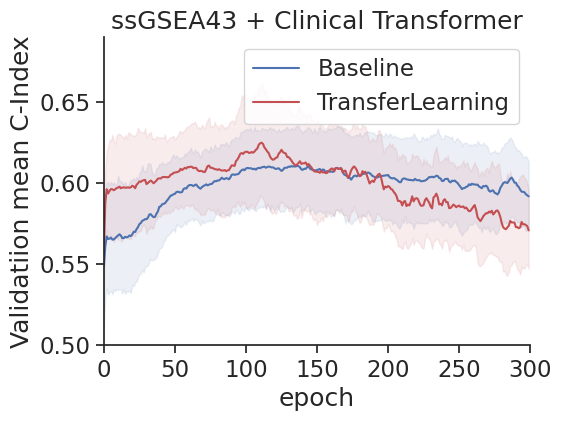

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1.5)

fig, ax = plt.subplots(figsize=(5.5, 4))

sns.lineplot(data=exps, x = 'epoch', 
             y = 'epoch_sigmoid_concordance', 
             hue = 'Model', ax=ax, errorbar=('ci', 85),
             palette=['b', 'r']
            )

for artist in ax.collections:
    if artist.__class__.__name__ == 'PolyCollection':
        artist.set_alpha(0.1)  # shadow alpha
        
ax.set_ylim(0.5, 0.69)
ax.set_xlim(0,300)
ax.tick_params(bottom=True, left=True)
ax.set_ylabel('Validatiion mean C-Index')
ax.set_title('ssGSEA43 + Clinical Transformer')
sns.despine()
ax.legend_.set_title('')
fig.savefig('./results/validtaion_cindex.svg', bbox_inches = 'tight')